<a href="https://colab.research.google.com/github/selinpinarkoc/AygazYZOkuryazarligi/blob/main/Melbourne_housing_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Price Predictions with Melbourne Housing Dataset**

In [262]:
# Project Title: Housing Price Predictions with Melbourne Housing Dataset
# Author: Selin Pınar Koç, Sena Yüksel
# Date: October 21, 2023


# 2. Importing Required Libraries

In [263]:
#  Import the required libraries for the project to the Colab environment.
#  Import NumPy, Pandas, Seaborn, and Matplotlib libraries for data analysis
#  Import sklearn.model_selection, sklearn.metrics, sklearn.ensemble,
# sklearn.linear_model, sklearn_tree, sklearn.neighbour libraries and modules for
# modellling and evaluating performance of the model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 4. Gathering and Observing Data

In [264]:
# Load the dataset to the project and observe the first 5 columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)
df = pd.read_csv("/content/Melbourne_housing_FULL.csv")
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [265]:
# Find the shape, number of columns and size of the dataset
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

#  Show the information of the dataset, which contains the number of columns,
# column labels, column data types, memory usage, range index, and
# the number of cells in each column (non-null values).
data_info = df_copy.info()


Shape     : (34857, 21)
Size      : 731997
Dimension : 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object

# 5. Exploratory Data Analysis

In [266]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [267]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34856.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.00,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26640.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26631.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26129.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13742.00,160.26,401.27,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15551.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


In [268]:
df_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [269]:
# Missing Values
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                     0.00
Address                               0                     0.00
Rooms                                 0                     0.00
Type                                  0                     0.00
Price                              7610                    21.83
Method                                0                     0.00
SellerG                               0                     0.00
Date                                  0                     0.00
Distance                              1                     0.00
Postcode                              1                     0.00
Bedroom2                           8217                    23.57
Bathroom                           8226                    23.60
Car                                8728                    25.04
Landsize                          11810                    33.88
BuildingArea             

In [270]:
# Define categorical variables
categorical_columns = ['Type', 'Method', 'Regionname']
for column in categorical_columns:
    df_copy[column] = df_copy[column].fillna(df_copy[column].mode().iloc[0])

In [271]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           0
Propertycount        3
dtype: int64

In [272]:
# Handling outliers using the z-score method
from scipy import stats

# Calculate the Z-scores
z_scores = np.abs(zscore(df_copy[['Landsize', 'BuildingArea']]))

# Set a Z-score threshold to identify outliers (e.g., 3 standard deviations)
threshold = 3

# Identify the rows of the outliers
outliers = np.where(z_scores > threshold)
indices = outliers[0]

# Create a new dataset without outliers
filtered_data = df.drop(df.index[indices])
filtered_data = filtered_data.reset_index(drop=True)



In [273]:
filtered_data.shape

(34857, 21)

In [274]:
# remove missing values.
filtered_data.dropna(inplace=True)

In [275]:
filtered_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
11,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,4.00,2.00,0.00,245.00,210.00,1910.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
14,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,2.00,1.00,2.00,256.00,107.00,1890.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00


<ipython-input-276-6cbdc6bc76c5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_data.corr()


<Axes: >

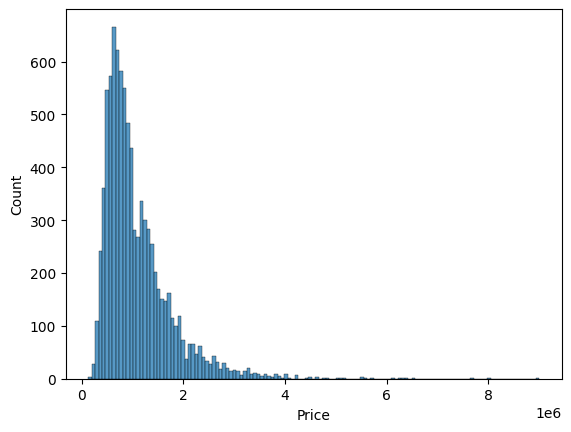

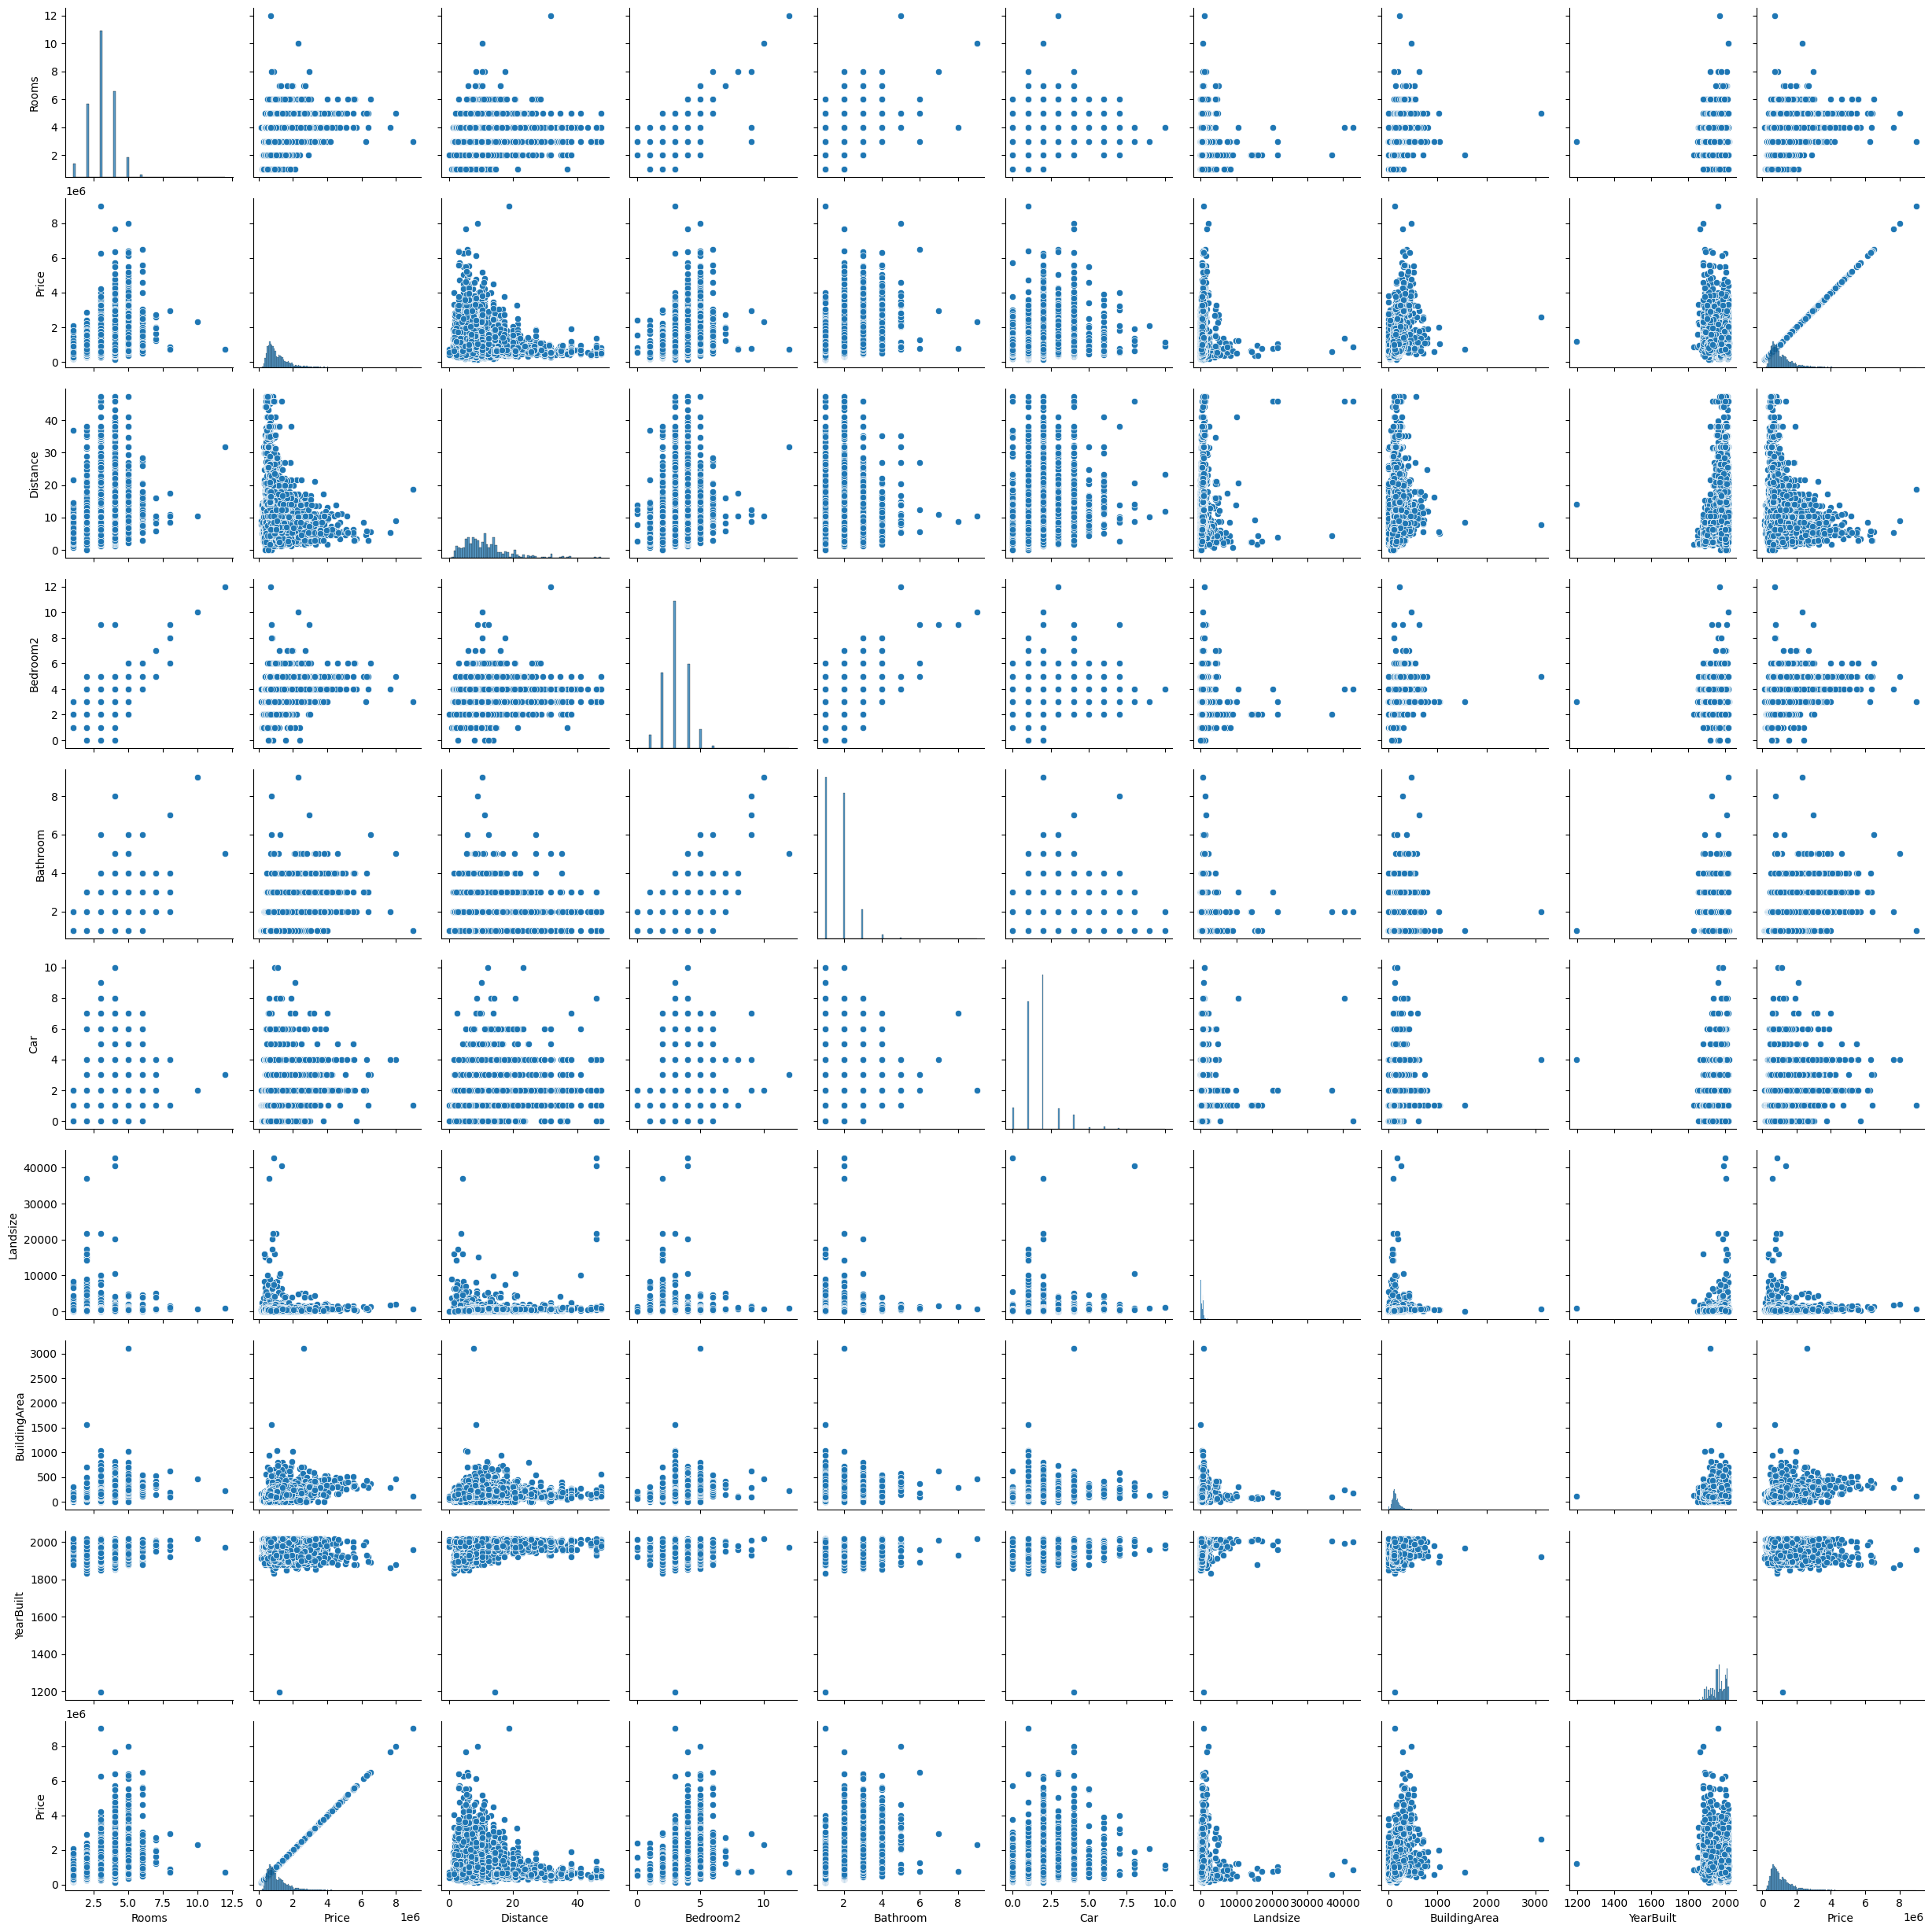

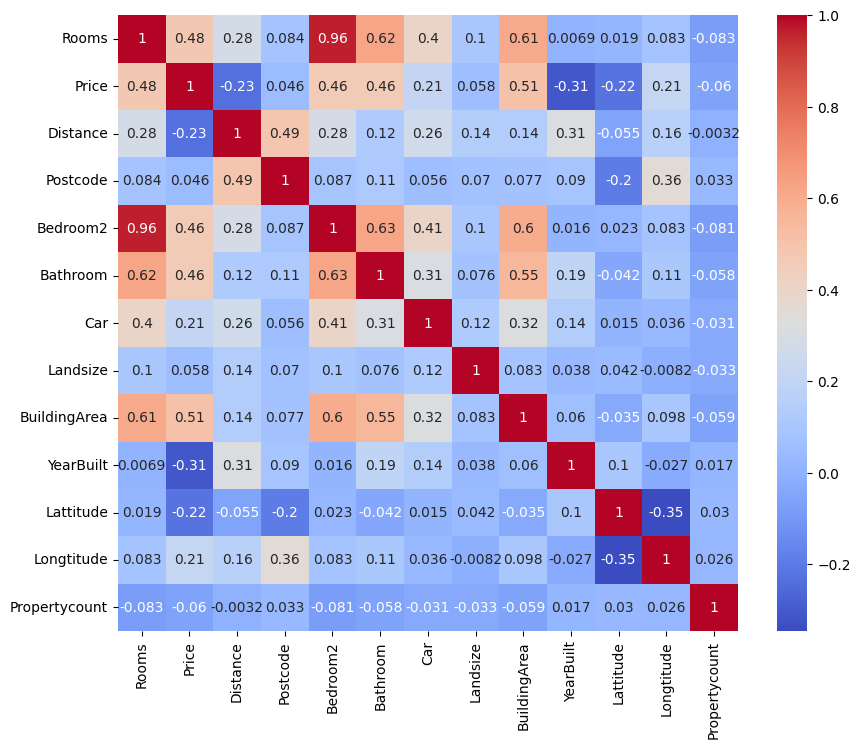

In [276]:
# Data Visualization
sns.histplot(filtered_data['Price'])
sns.pairplot(filtered_data, vars=['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price'])
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [278]:
# Encoding categorical variables using Label Encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in filtered_data.select_dtypes(include=['object']):
    filtered_data[column] = label_encoder.fit_transform(filtered_data[column])

In [279]:
filtered_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,0,3922,2,0,1035000.00,1,22,62,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,31,-37.81,144.99,2,4019.00
4,0,6458,3,0,1465000.00,3,22,63,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,31,-37.81,144.99,2,4019.00
6,0,6960,4,0,1600000.00,4,147,64,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,31,-37.81,144.99,2,4019.00
11,0,1374,3,0,1876000.00,1,147,69,2.50,3067.00,4.00,2.00,0.00,245.00,210.00,1910.00,31,-37.80,145.00,2,4019.00
14,0,8740,2,0,1636000.00,1,147,74,2.50,3067.00,2.00,1.00,2.00,256.00,107.00,1890.00,31,-37.81,145.00,2,4019.00


# 6. Model Selection

In [280]:
# Define X and y variables
X = filtered_data.drop('Price', axis=1)
y = filtered_data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your models using the preprocessed data
models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)}
}

results = {}

for model_name, model_params in models.items():
    model = model_params['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    # Display results
for model_name, metrics in results.items():
    print(f'{model_name} Metrics:')
    print(f'MAE: {metrics["MAE"]}')
    print(f'MSE: {metrics["MSE"]}')
    print(f'RMSE: {metrics["RMSE"]}')
    print(f'R2: {metrics["R2"]}')
    print('---')

# Choose the best performing model based on evaluation metrics
best_model = min(results, key=lambda x: results[x]['RMSE'])
print(f'Best Model: {best_model}')


Lasso Metrics:
MAE: 253355.62649032028
MSE: 127598610148.8293
RMSE: 357209.476566383
R2: 0.6678947608445707
---
LinearRegression Metrics:
MAE: 253357.62678877145
MSE: 127600004698.18965
RMSE: 357211.42856603797
R2: 0.6678911312035559
---
Ridge Metrics:
MAE: 253203.1803422253
MSE: 127486440521.1625
RMSE: 357052.4338541365
R2: 0.6681867085466562
---
ElasticNet Metrics:
MAE: 259468.1643551349
MSE: 137386158012.81088
RMSE: 370656.38806421624
R2: 0.6424203773828585
---
KNeighborsRegressor Metrics:
MAE: 360690.9049493813
MSE: 264355291768.732
RMSE: 514154.9297329862
R2: 0.31195349782841253
---
RandomForestRegressor Metrics:
MAE: 150892.31811586051
MSE: 59256567095.36651
RMSE: 243426.71812142254
R2: 0.8457709189482344
---
GradientBoostingRegressor Metrics:
MAE: 165409.0932349024
MSE: 64514917377.88339
RMSE: 253997.86884516058
R2: 0.8320848319595016
---
AdaBoostRegressor Metrics:
MAE: 317653.30657422997
MSE: 174625895370.4257
RMSE: 417882.633487473
R2: 0.5454952473456994
---
Best Model: Random